In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
## EXPERIMENTAL LLM MATRICES
models = ['llama', 'mistral', 'qwen']
versions = ['woman', 'man', 'nb', 'white', 'black', 'ME', 'asian','oneeuro', '100euro', '10keuro']
matrices_llm = {}
matrices_rep = {}
reps = ['2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20','21','22','23',
        '24','25','26','27','28','29','30','31','32','33','34','35','37','38','39','40','41','42','43','44',
       '45','46','47','48','49','50']

for model in models:
    for version in versions:
        matrix1 = np.loadtxt(f"{model}_{version}1.txt")
        matrix2 = np.loadtxt(f"{model}_{version}2.txt")
        matrix = (matrix1 + matrix2)/2
        key = f"{model}_{version}"
        matrices_llm[key] = matrix
        
for model in models:
    matrix1 = np.loadtxt(f"{model}10rep_final1.txt")
    matrix2 = np.loadtxt(f"{model}10rep_final2.txt")
    matrix = (matrix1 + matrix2)/2
    key = f"{model}_final"
    matrices_llm[key] = matrix

for model in ['mistral', 'qwen']:
    for version in ['right', 'left']:
        matrix1 = np.loadtxt(f"{model}_{version}1.txt")
        matrix2 = np.loadtxt(f"{model}_{version}2.txt")
        matrix = (matrix1 + matrix2)/2
        key = f"{model}_{version}"
        matrices_llm[key] = matrix
  
extractions = {'simple', 'extract', 'multi'}
for model in models:
    for extract in extractions:
        key = f"{model}_{extract}"
        matrices_llm[key] =  np.loadtxt(f"{model}_{extract}.txt")

for model in models:
    for rep in reps:
        key = f"{model}_final{rep}"
        matrices_rep[key] = np.loadtxt(f"{model}_finalr{rep}.txt")

In [3]:
## THEORETICAL AND HUMAN MATRICES
#comparison = ['human', 'nash', 'optimist', 'envious', 'pessimist', 'trustful']
comparison = ['human']
matrices_theoretical = {}
for element in comparison:
    matrices_theoretical[element] = np.loadtxt(f"matrix_{element}")

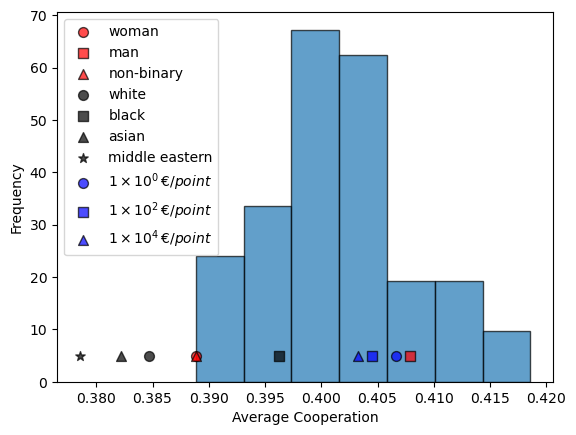

In [4]:
## HISTOGRAMS OF LLAMA AVERAGE COOPERATION
cooperation_llama = []
cooperation_llama.append(np.mean(matrices_llm['llama_final']))
for rep in reps:
    key = f"llama_final{rep}"
    matrix = matrices_rep[key]
    cooperation_llama.append(np.mean(matrix))
# Cooperation for all the biasing
plt.scatter(np.mean(matrices_llm['llama_woman']), 5, color="red",marker="o",edgecolors='black', zorder=5, s=50, alpha = 0.7, label="woman")
plt.scatter(np.mean(matrices_llm['llama_man']), 5, color="red",marker="s",edgecolors='black', zorder=5, s=50, alpha = 0.7,label="man")
plt.scatter(np.mean(matrices_llm['llama_nb']), 5, color="red",marker="^" ,edgecolors='black',zorder=5, s=50, alpha = 0.7,label="non-binary")
plt.scatter(np.mean(matrices_llm['llama_white']), 5, color="black",marker="o",edgecolors='black',zorder=5, s=50, alpha = 0.7, label="white")
plt.scatter(np.mean(matrices_llm['llama_black']), 5, color="black",marker="s",edgecolors='black',zorder=5, s=50, alpha = 0.7,label="black")
plt.scatter(np.mean(matrices_llm['llama_asian']), 5, color="black",marker="^",edgecolors='black',zorder=5, s=50, alpha = 0.7, label="asian")
plt.scatter(np.mean(matrices_llm['llama_ME']), 5, color="black", marker="*",edgecolors='black',zorder=5, s=50,  alpha = 0.7,label="middle eastern")
plt.scatter(np.mean(matrices_llm['llama_oneeuro']), 5, color="blue",marker="o" ,edgecolors='black',zorder=5, s=50,  alpha = 0.7, label=r"$1\times10^{0}\,€/point$")
plt.scatter(np.mean(matrices_llm['llama_100euro']), 5, color="blue", marker="s",edgecolors='black',zorder=5, s=50, alpha = 0.7, label=r"$1\times10^{2}\,€/point$")
plt.scatter(np.mean(matrices_llm['llama_10keuro']), 5, color="blue", marker="^",edgecolors='black',zorder=5, s=50, alpha = 0.7, label=r"$1\times10^{4}\,€/point$")

counts, bins, patches = plt.hist(cooperation_llama, edgecolor='black', bins =7, alpha = 0.7, density = True)
plt.xlabel('Average Cooperation')
plt.ylabel('Frequency')
plt.legend(loc ='upper left')
plt.savefig('histogramllama.jpg')
plt.show()

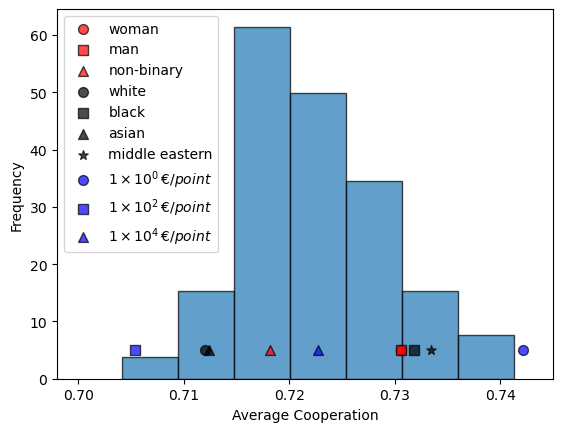

In [5]:
## HISTOGRAMS OF MISTRAL AVERAGE COOPERATION
cooperation_mistral = []
cooperation_mistral.append(np.mean(matrices_llm['mistral_final']))
for rep in reps:
    key = f"mistral_final{rep}"
    matrix = matrices_rep[key]
    cooperation_mistral.append(np.mean(matrix))
# Cooperation for all the biasing
plt.scatter(np.mean(matrices_llm['mistral_woman']), 5, color="red",marker="o",edgecolors='black', zorder=5, s=50, alpha = 0.7, label="woman")
plt.scatter(np.mean(matrices_llm['mistral_man']), 5, color="red",marker="s",edgecolors='black', zorder=5, s=50, alpha = 0.7,label="man")
plt.scatter(np.mean(matrices_llm['mistral_nb']), 5, color="red",marker="^" ,edgecolors='black',zorder=5, s=50, alpha = 0.7,label="non-binary")
plt.scatter(np.mean(matrices_llm['mistral_white']), 5, color="black",marker="o",edgecolors='black',zorder=5, s=50, alpha = 0.7, label="white")
plt.scatter(np.mean(matrices_llm['mistral_black']), 5, color="black",marker="s",edgecolors='black',zorder=5, s=50, alpha = 0.7,label="black")
plt.scatter(np.mean(matrices_llm['mistral_asian']), 5, color="black",marker="^",edgecolors='black',zorder=5, s=50, alpha = 0.7, label="asian")
plt.scatter(np.mean(matrices_llm['mistral_ME']), 5, color="black", marker="*",edgecolors='black',zorder=5, s=50,  alpha = 0.7,label="middle eastern")
plt.scatter(np.mean(matrices_llm['mistral_oneeuro']), 5, color="blue",marker="o" ,edgecolors='black',zorder=5, s=50,  alpha = 0.7, label=r"$1\times10^{0}\,€/point$")
plt.scatter(np.mean(matrices_llm['mistral_100euro']), 5, color="blue", marker="s",edgecolors='black',zorder=5, s=50, alpha = 0.7, label=r"$1\times10^{2}\,€/point$")
plt.scatter(np.mean(matrices_llm['mistral_10keuro']), 5, color="blue", marker="^",edgecolors='black',zorder=5, s=50, alpha = 0.7, label=r"$1\times10^{4}\,€/point$")

plt.hist(cooperation_mistral, bins = 7, edgecolor='black', alpha = 0.7, density = True)
plt.xlabel('Average Cooperation')
plt.ylabel('Frequency')
plt.xlim([0.698,0.745])
plt.legend(loc = 'upper left')
plt.savefig('histogrammistral.jpg')
plt.show()

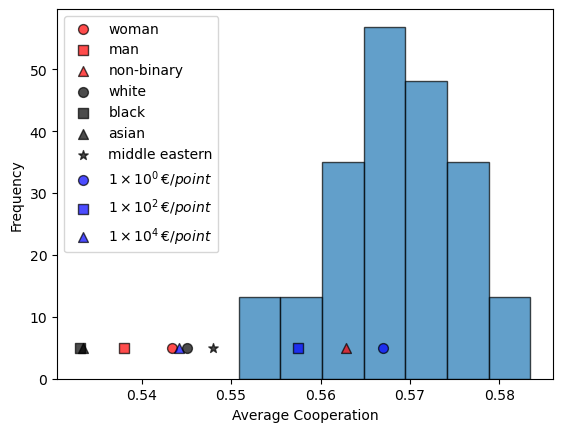

In [6]:
## HISTOGRAMS OF QWEN AVERAGE COOPERATION
cooperation_qwen = []
cooperation_qwen.append(np.mean(matrices_llm['qwen_final']))
for rep in reps:
    key = f"qwen_final{rep}"
    matrix = matrices_rep[key]
    cooperation_qwen.append(np.mean(matrix))
# Cooperation for all the biasing
plt.scatter(np.mean(matrices_llm['qwen_woman']), 5, color="red",marker="o",edgecolors='black', zorder=5, s=50, alpha = 0.7, label="woman")
plt.scatter(np.mean(matrices_llm['qwen_man']), 5, color="red",marker="s",edgecolors='black', zorder=5, s=50, alpha = 0.7,label="man")
plt.scatter(np.mean(matrices_llm['qwen_nb']), 5, color="red",marker="^" ,edgecolors='black',zorder=5, s=50, alpha = 0.7,label="non-binary")
plt.scatter(np.mean(matrices_llm['qwen_white']), 5, color="black",marker="o",edgecolors='black',zorder=5, s=50, alpha = 0.7, label="white")
plt.scatter(np.mean(matrices_llm['qwen_black']), 5, color="black",marker="s",edgecolors='black',zorder=5, s=50, alpha = 0.7,label="black")
plt.scatter(np.mean(matrices_llm['qwen_asian']), 5, color="black",marker="^",edgecolors='black',zorder=5, s=50, alpha = 0.7, label="asian")
plt.scatter(np.mean(matrices_llm['qwen_ME']), 5, color="black", marker="*",edgecolors='black',zorder=5, s=50,  alpha = 0.7,label="middle eastern")
plt.scatter(np.mean(matrices_llm['qwen_oneeuro']), 5, color="blue",marker="o" ,edgecolors='black',zorder=5, s=50,  alpha = 0.7, label=r"$1\times10^{0}\,€/point$")
plt.scatter(np.mean(matrices_llm['qwen_100euro']), 5, color="blue", marker="s",edgecolors='black',zorder=5, s=50, alpha = 0.7, label=r"$1\times10^{2}\,€/point$")
plt.scatter(np.mean(matrices_llm['qwen_10keuro']), 5, color="blue", marker="^",edgecolors='black',zorder=5, s=50, alpha = 0.7, label=r"$1\times10^{4}\,€/point$")

counts, bins, patches = plt.hist(cooperation_qwen, bins = 7, edgecolor='black', alpha = 0.7, density = True)
plt.xlabel('Average Cooperation')
plt.ylabel('Frequency')
plt.legend()
plt.savefig('histogramqwen.jpg')
plt.show()

In [7]:
## LLAMA VS PHENOTYPES
colors = ["#4E79A7",  
          "#F28E2B",  
          "#76B7B2",  
          "#E15759", 
          "#59A14F",
          "#EDC948"] 

comparison = ['human', 'nash', 'optimist', 'envious', 'pessimist', 'trustful']
diff_llama = {}
for element in comparison:
    diff_llama[element] = np.mean((matrices_llm['llama_final'] - matrices_theoretical[element])**2)

print(diff_llama)

plt.bar(diff_llama.keys(), diff_llama.values(), color = colors)
plt.ylabel('Mean Squared Displacement (MSD)')
plt.xlabel('Matrix compared')
plt.savefig('msdllama.jpg')
plt.show()

KeyError: 'nash'

In [ ]:
pearson_llama = {}
for element in comparison:
    pearson_llama[element] = np.corrcoef(matrices_llm['llama_final'].ravel(), matrices_theoretical[element].ravel())[0, 1]

print(pearson_llama)

plt.bar(pearson_llama.keys(), pearson_llama.values(), color = colors)
plt.ylabel('Pearson Correlation Coefficient (r)')
plt.xlabel('Matrix compared')
plt.savefig('pearsonllama.jpg')
plt.show()

In [ ]:
cmap = plt.cm.viridis

fig = plt.figure(figsize=(12, 6))

ax0 = plt.subplot2grid((3, 3), (0, 0), rowspan=3, colspan=1)
ax1 = plt.subplot2grid((3, 3), (0, 1), colspan=1)
ax2 = plt.subplot2grid((3, 3), (0, 2), colspan=1)
ax3 = plt.subplot2grid((3, 3), (1, 1), colspan=1)
ax4 = plt.subplot2grid((3, 3), (1, 2), colspan=1)
ax5 = plt.subplot2grid((3, 3), (2, 1), colspan=1)
ax6 = plt.subplot2grid((3, 3), (2, 2), colspan=1)

small_plots = [
    (ax1, matrices_theoretical['human'], "Human"),
    (ax2, matrices_theoretical['nash'], "Nash"),
    (ax3, matrices_theoretical['optimist'], "Optimist"),
    (ax4, matrices_theoretical['envious'], "Envious"),
    (ax5, matrices_theoretical['pessimist'], "Pessimist"),
    (ax6, matrices_theoretical['trustful'], "Trustful")
]

# Títol principal
#fig.suptitle("Comparison of Cooperation Matrices: LLaMA vs. Phenotypes, Humans and Nash equilibrium", fontsize=16, fontweight='bold')

# Heatmap gran (LLaMA)
im0 = ax0.imshow(matrices_llm['llama_final'], aspect='equal', cmap=cmap, vmin=0, vmax=1)
ax0.set_xlabel("T")
ax0.set_ylabel("S")
ax0.set_title("LLaMA", fontsize=12)
fig.colorbar(im0, ax=ax0, shrink=0.8, pad=0.05, label="Average Cooperation")

# Configuració dels ticks per al gràfic gran
ax0.set_xticks(np.arange(11)) # Neteja els ticks actuals
ax0.set_xticklabels(np.arange(5, 16)) # Posa les etiquetes de T de 5 a 15
ax0.set_yticks(np.arange(11))
ax0.set_yticklabels(np.arange(10, -1, -1))

# Heatmaps petits (teòrics)
for ax, data, title in small_plots:
    im = ax.imshow(data, aspect='equal', cmap=cmap, vmin=0, vmax=1)
    ax.set_title(title, fontsize=10)
    
    # Per a l'eix X (T)
    ax.set_xticks([0, 5, 10])
    ax.set_xticklabels([5, 10, 15])
    
    # Per a l'eix Y (S)
    ax.set_yticks([0, 5, 10])
    ax.set_yticklabels([10, 5, 0])
    
    # Afegir les etiquetes T i S a cada gràfic petit
    ax.set_xlabel("T")
    ax.set_ylabel("S")

plt.tight_layout()
plt.savefig('comparellamaphenotypes.jpg')
plt.show()

In [ ]:
## MISTRAL VS PHENOTYPES
colors = ["#4E79A7",  
          "#F28E2B",  
          "#76B7B2",  
          "#E15759", 
          "#59A14F",
          "#EDC948"] 

comparison = ['human', 'nash', 'optimist', 'envious', 'pessimist', 'trustful']
diff_llama = {}
for element in comparison:
    diff_llama[element] = np.mean((matrices_llm['mistral_final'] - matrices_theoretical[element])**2)
print(diff_llama)

plt.bar(diff_llama.keys(), diff_llama.values(), color = colors)
plt.ylabel('Mean Squared Displacement (MSD)')
plt.xlabel('Matrix compared')
plt.savefig('msdmistral.jpg')
plt.show()

In [ ]:
pearson_llama = {}
for element in comparison:
    pearson_llama[element] = np.corrcoef(matrices_llm['mistral_final'].ravel(), matrices_theoretical[element].ravel())[0, 1]

print(pearson_llama)

plt.bar(pearson_llama.keys(), pearson_llama.values(), color = colors)
plt.ylabel('Pearson Correlation Coefficient (r)')
plt.xlabel('Matrix compared')
plt.savefig('pearsonmistral.jpg')
plt.show()

In [ ]:
cmap = plt.cm.viridis

fig = plt.figure(figsize=(12, 6))

ax0 = plt.subplot2grid((3, 3), (0, 0), rowspan=3, colspan=1)
ax1 = plt.subplot2grid((3, 3), (0, 1), colspan=1)
ax2 = plt.subplot2grid((3, 3), (0, 2), colspan=1)
ax3 = plt.subplot2grid((3, 3), (1, 1), colspan=1)
ax4 = plt.subplot2grid((3, 3), (1, 2), colspan=1)
ax5 = plt.subplot2grid((3, 3), (2, 1), colspan=1)
ax6 = plt.subplot2grid((3, 3), (2, 2), colspan=1)

small_plots = [
    (ax1, matrices_theoretical['human'], "Human"),
    (ax2, matrices_theoretical['nash'], "Nash"),
    (ax3, matrices_theoretical['optimist'], "Optimist"),
    (ax4, matrices_theoretical['envious'], "Envious"),
    (ax5, matrices_theoretical['pessimist'], "Pessimist"),
    (ax6, matrices_theoretical['trustful'], "Trustful")
]


# Heatmap gran (LLaMA)
im0 = ax0.imshow(matrices_llm['mistral_final'], aspect='equal', cmap=cmap, vmin=0, vmax=1)
ax0.set_xlabel("T")
ax0.set_ylabel("S")
ax0.set_title("Mistral", fontsize=12)
fig.colorbar(im0, ax=ax0, shrink=0.8, pad=0.05, label="Average Cooperation")

# Configuració dels ticks per al gràfic gran
ax0.set_xticks(np.arange(11)) # Neteja els ticks actuals
ax0.set_xticklabels(np.arange(5, 16)) # Posa les etiquetes de T de 5 a 15
ax0.set_yticks(np.arange(11))
ax0.set_yticklabels(np.arange(10, -1, -1))

# Heatmaps petits (teòrics)
for ax, data, title in small_plots:
    im = ax.imshow(data, aspect='equal', cmap=cmap, vmin=0, vmax=1)
    ax.set_title(title, fontsize=10)
    
    # Per a l'eix X (T)
    ax.set_xticks([0, 5, 10])
    ax.set_xticklabels([5, 10, 15])
    
    # Per a l'eix Y (S)
    ax.set_yticks([0, 5, 10])
    ax.set_yticklabels([10, 5, 0])
    
    # Afegir les etiquetes T i S a cada gràfic petit
    ax.set_xlabel("T")
    ax.set_ylabel("S")

plt.tight_layout()
plt.savefig('comparephenotypesmistral.jpg')
plt.show()

In [ ]:
## QWEN VS PHENOTYPES
colors = ["#4E79A7",  
          "#F28E2B",  
          "#76B7B2",  
          "#E15759", 
          "#59A14F",
          "#EDC948"] 

comparison = ['human', 'nash', 'optimist', 'envious', 'pessimist', 'trustful']
diff_llama = {}
for element in comparison:
    diff_llama[element] = np.mean((matrices_llm['qwen_final'] - matrices_theoretical[element])**2)
print(diff_llama)

plt.bar(diff_llama.keys(), diff_llama.values(), color = colors)
plt.ylabel('Mean Squared Displacement (MSD)')
plt.xlabel('Matrix compared')
plt.savefig('msdqwen.jpg')
plt.show()

In [ ]:
pearson_llama = {}
for element in comparison:
    pearson_llama[element] = np.corrcoef(matrices_llm['qwen_final'].ravel(), matrices_theoretical[element].ravel())[0, 1]

print(pearson_llama)

plt.bar(pearson_llama.keys(), pearson_llama.values(), color = colors)
plt.ylabel('Pearson Correlation Coefficient (r)')
plt.xlabel('Matrix compared')
plt.savefig('pearsonqwen.jpg')
plt.show()

In [ ]:
cmap = plt.cm.viridis

fig = plt.figure(figsize=(12, 6))

ax0 = plt.subplot2grid((3, 3), (0, 0), rowspan=3, colspan=1)
ax1 = plt.subplot2grid((3, 3), (0, 1), colspan=1)
ax2 = plt.subplot2grid((3, 3), (0, 2), colspan=1)
ax3 = plt.subplot2grid((3, 3), (1, 1), colspan=1)
ax4 = plt.subplot2grid((3, 3), (1, 2), colspan=1)
ax5 = plt.subplot2grid((3, 3), (2, 1), colspan=1)
ax6 = plt.subplot2grid((3, 3), (2, 2), colspan=1)

small_plots = [
    (ax1, matrices_theoretical['human'], "Human"),
    (ax2, matrices_theoretical['nash'], "Nash"),
    (ax3, matrices_theoretical['optimist'], "Optimist"),
    (ax4, matrices_theoretical['envious'], "Envious"),
    (ax5, matrices_theoretical['pessimist'], "Pessimist"),
    (ax6, matrices_theoretical['trustful'], "Trustful")
]


# Heatmap gran (LLaMA)
im0 = ax0.imshow(matrices_llm['qwen_final'], aspect='equal', cmap=cmap, vmin=0, vmax=1)
ax0.set_xlabel("T")
ax0.set_ylabel("S")
ax0.set_title("Qwen", fontsize=12)
fig.colorbar(im0, ax=ax0, shrink=0.8, pad=0.05, label="Average Cooperation")

# Configuració dels ticks per al gràfic gran
ax0.set_xticks(np.arange(11)) # Neteja els ticks actuals
ax0.set_xticklabels(np.arange(5, 16)) # Posa les etiquetes de T de 5 a 15
ax0.set_yticks(np.arange(11))
ax0.set_yticklabels(np.arange(10, -1, -1))

# Heatmaps petits (teòrics)
for ax, data, title in small_plots:
    im = ax.imshow(data, aspect='equal', cmap=cmap, vmin=0, vmax=1)
    ax.set_title(title, fontsize=10)
    
    # Per a l'eix X (T)
    ax.set_xticks([0, 5, 10])
    ax.set_xticklabels([5, 10, 15])
    
    # Per a l'eix Y (S)
    ax.set_yticks([0, 5, 10])
    ax.set_yticklabels([10, 5, 0])
    
    # Afegir les etiquetes T i S a cada gràfic petit
    ax.set_xlabel("T")
    ax.set_ylabel("S")

plt.tight_layout()
plt.savefig('comparephenotypesqwen.jpg')
plt.show()

In [ ]:
## LLAMA GENDER
fig, axes = plt.subplots(2, 2)  # 1 fila, 3 columnes

# Primer plot
im0 = axes[0,0].imshow(matrices_llm['llama_final'], extent=[5, 15, 0, 10], aspect='equal')
axes[0,0].set_xlabel("T")
axes[0,0].set_ylabel("S")
axes[0,0].set_title('Neutral')
fig.colorbar(im0, ax=axes[0,0], label="Value")

# Segon plot
im1 = axes[0,1].imshow(matrices_llm['llama_woman'], extent=[5, 15, 0, 10], aspect='equal')
axes[0,1].set_xlabel("T")
axes[0,1].set_ylabel("S")
axes[0,1].set_title('Woman')
fig.colorbar(im1, ax=axes[0,1], label="Value")

# Tercer plot
im2 = axes[1,0].imshow(matrices_llm['llama_man'], extent=[5, 15, 0, 10], aspect='equal')
axes[1,0].set_xlabel("T")
axes[1,0].set_ylabel("S")
axes[1,0].set_title('Man')
fig.colorbar(im2, ax=axes[1,0], label="Value")

# Tercer plot
im2 = axes[1,1].imshow(matrices_llm['llama_nb'], extent=[5, 15, 0, 10], aspect='equal')
axes[1,1].set_xlabel("T")
axes[1,1].set_ylabel("S")
axes[1,1].set_title('Non-binary')
fig.colorbar(im2, ax=axes[1,1], label="Value")

plt.tight_layout()
plt.show()

In [ ]:
## MISTRAL GENDER
fig, axes = plt.subplots(2, 2)  # 1 fila, 3 columnes

# Primer plot
im0 = axes[0,0].imshow(matrices_llm['mistral_final'], extent=[5, 15, 0, 10], aspect='equal')
axes[0,0].set_xlabel("T")
axes[0,0].set_ylabel("S")
axes[0,0].set_title('Neutral')
fig.colorbar(im0, ax=axes[0,0], label="Value")

# Segon plot
im1 = axes[0,1].imshow(matrices_llm['mistral_woman'], extent=[5, 15, 0, 10], aspect='equal')
axes[0,1].set_xlabel("T")
axes[0,1].set_ylabel("S")
axes[0,1].set_title('Woman')
fig.colorbar(im1, ax=axes[0,1], label="Value")

# Tercer plot
im2 = axes[1,0].imshow(matrices_llm['mistral_man'], extent=[5, 15, 0, 10], aspect='equal')
axes[1,0].set_xlabel("T")
axes[1,0].set_ylabel("S")
axes[1,0].set_title('Man')
fig.colorbar(im2, ax=axes[1,0], label="Value")

# Tercer plot
im2 = axes[1,1].imshow(matrices_llm['mistral_nb'], extent=[5, 15, 0, 10], aspect='equal')
axes[1,1].set_xlabel("T")
axes[1,1].set_ylabel("S")
axes[1,1].set_title('Non-binary')
fig.colorbar(im2, ax=axes[1,1], label="Value")

plt.tight_layout()
plt.show()

In [ ]:
## QWEN GENDER
fig, axes = plt.subplots(2, 2)  # 1 fila, 3 columnes

# Primer plot
im0 = axes[0,0].imshow(matrices_llm['qwen_final'], extent=[5, 15, 0, 10], aspect='equal')
axes[0,0].set_xlabel("T")
axes[0,0].set_ylabel("S")
axes[0,0].set_title('Neutral')
fig.colorbar(im0, ax=axes[0,0], label="Value")

# Segon plot
im1 = axes[0,1].imshow(matrices_llm['qwen_woman'], extent=[5, 15, 0, 10], aspect='equal')
axes[0,1].set_xlabel("T")
axes[0,1].set_ylabel("S")
axes[0,1].set_title('Woman')
fig.colorbar(im1, ax=axes[0,1], label="Value")

# Tercer plot
im2 = axes[1,0].imshow(matrices_llm['qwen_man'], extent=[5, 15, 0, 10], aspect='equal')
axes[1,0].set_xlabel("T")
axes[1,0].set_ylabel("S")
axes[1,0].set_title('Man')
fig.colorbar(im2, ax=axes[1,0], label="Value")

# Tercer plot
im2 = axes[1,1].imshow(matrices_llm['qwen_nb'], extent=[5, 15, 0, 10], aspect='equal')
axes[1,1].set_xlabel("T")
axes[1,1].set_ylabel("S")
axes[1,1].set_title('Non-binary')
fig.colorbar(im2, ax=axes[1,1], label="Value")

plt.tight_layout()
plt.show()

# Ethnicity

In [ ]:
## LLAMA
fig, axes = plt.subplots(2, 3, figsize=(12, 8))  # 2 files x 3 columnes
axes = axes.flatten()

# 1. Neutral
im0 = axes[0].imshow(matrices_llm['llama_final'], extent=[5, 15, 0, 10], aspect='equal')
axes[0].set_title('Neutral')
axes[0].set_xlabel("T")
axes[0].set_ylabel("S")
fig.colorbar(im0, ax=axes[0], label="Value")

# 2. Woman
im1 = axes[1].imshow(matrices_llm['llama_white'], extent=[5, 15, 0, 10], aspect='equal')
axes[1].set_title('White')
axes[1].set_xlabel("T")
axes[1].set_ylabel("S")
fig.colorbar(im1, ax=axes[1], label="Value")

# 3. Man
im2 = axes[2].imshow(matrices_llm['llama_black'], extent=[5, 15, 0, 10], aspect='equal')
axes[2].set_title('Black')
axes[2].set_xlabel("T")
axes[2].set_ylabel("S")
fig.colorbar(im2, ax=axes[2], label="Value")

# 4. Non-binary
im3 = axes[3].imshow(matrices_llm['llama_asian'], extent=[5, 15, 0, 10], aspect='equal')
axes[3].set_title('Asian')
axes[3].set_xlabel("T")
axes[3].set_ylabel("S")
fig.colorbar(im3, ax=axes[3], label="Value")

# 5. Fifth category (exemple: 'qwen_other')
im4 = axes[4].imshow(matrices_llm['llama_ME'], extent=[5, 15, 0, 10], aspect='equal')
axes[4].set_title('Middle Eastern')
axes[4].set_xlabel("T")
axes[4].set_ylabel("S")
fig.colorbar(im4, ax=axes[4], label="Value")

# Eliminar l’últim subplot buit (perquè 2x3=6 i només volem 5)
fig.delaxes(axes[5])

plt.tight_layout()
plt.show()


In [ ]:
## MISTRAL
fig, axes = plt.subplots(2, 3, figsize=(12, 8))  # 2 files x 3 columnes
axes = axes.flatten()

# 1. Neutral
im0 = axes[0].imshow(matrices_llm['mistral_final'], extent=[5, 15, 0, 10], aspect='equal')
axes[0].set_title('Neutral')
axes[0].set_xlabel("T")
axes[0].set_ylabel("S")
fig.colorbar(im0, ax=axes[0], label="Value")

# 2. Woman
im1 = axes[1].imshow(matrices_llm['mistral_white'], extent=[5, 15, 0, 10], aspect='equal')
axes[1].set_title('White')
axes[1].set_xlabel("T")
axes[1].set_ylabel("S")
fig.colorbar(im1, ax=axes[1], label="Value")

# 3. Man
im2 = axes[2].imshow(matrices_llm['mistral_black'], extent=[5, 15, 0, 10], aspect='equal')
axes[2].set_title('Black')
axes[2].set_xlabel("T")
axes[2].set_ylabel("S")
fig.colorbar(im2, ax=axes[2], label="Value")

# 4. Non-binary
im3 = axes[3].imshow(matrices_llm['mistral_asian'], extent=[5, 15, 0, 10], aspect='equal')
axes[3].set_title('Asian')
axes[3].set_xlabel("T")
axes[3].set_ylabel("S")
fig.colorbar(im3, ax=axes[3], label="Value")

# 5. Fifth category (exemple: 'qwen_other')
im4 = axes[4].imshow(matrices_llm['mistral_ME'], extent=[5, 15, 0, 10], aspect='equal')
axes[4].set_title('Middle Eastern')
axes[4].set_xlabel("T")
axes[4].set_ylabel("S")
fig.colorbar(im4, ax=axes[4], label="Value")

# Eliminar l’últim subplot buit (perquè 2x3=6 i només volem 5)
fig.delaxes(axes[5])

plt.tight_layout()
plt.show()

In [ ]:
## QWEN
fig, axes = plt.subplots(2, 3, figsize=(12, 8))  # 2 files x 3 columnes
axes = axes.flatten()

# 1. Neutral
im0 = axes[0].imshow(matrices_llm['qwen_final'], extent=[5, 15, 0, 10], aspect='equal')
axes[0].set_title('Neutral')
axes[0].set_xlabel("T")
axes[0].set_ylabel("S")
fig.colorbar(im0, ax=axes[0], label="Value")

# 2. Woman
im1 = axes[1].imshow(matrices_llm['qwen_white'], extent=[5, 15, 0, 10], aspect='equal')
axes[1].set_title('White')
axes[1].set_xlabel("T")
axes[1].set_ylabel("S")
fig.colorbar(im1, ax=axes[1], label="Value")

# 3. Man
im2 = axes[2].imshow(matrices_llm['qwen_black'], extent=[5, 15, 0, 10], aspect='equal')
axes[2].set_title('Black')
axes[2].set_xlabel("T")
axes[2].set_ylabel("S")
fig.colorbar(im2, ax=axes[2], label="Value")

# 4. Non-binary
im3 = axes[3].imshow(matrices_llm['qwen_asian'], extent=[5, 15, 0, 10], aspect='equal')
axes[3].set_title('Asian')
axes[3].set_xlabel("T")
axes[3].set_ylabel("S")
fig.colorbar(im3, ax=axes[3], label="Value")

# 5. Fifth category (exemple: 'qwen_other')
im4 = axes[4].imshow(matrices_llm['qwen_ME'], extent=[5, 15, 0, 10], aspect='equal')
axes[4].set_title('Middle Eastern')
axes[4].set_xlabel("T")
axes[4].set_ylabel("S")
fig.colorbar(im4, ax=axes[4], label="Value")

# Eliminar l’últim subplot buit (perquè 2x3=6 i només volem 5)
fig.delaxes(axes[5])

plt.tight_layout()
plt.show()

## MONEY


In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))  # 1 fila, 3 columnes

# Primer plot
im0 = axes[0].imshow(matrices_llm['llama_oneeuro'], extent=[5, 15, 0, 10], aspect='equal')
axes[0].set_xlabel("T")
axes[0].set_ylabel("S")
axes[0].set_title(r"$1\times10^{0}\,€/point$")
fig.colorbar(im0, ax=axes[0], label="Value")

# Segon plot
im1 = axes[1].imshow(matrices_llm['llama_100euro'], extent=[5, 15, 0, 10], aspect='equal')
axes[1].set_xlabel("T")
axes[1].set_ylabel("S")
axes[1].set_title(r"$1\times10^{2}\,€/point$")
fig.colorbar(im1, ax=axes[1], label="Value")

# Tercer plot
im2 = axes[2].imshow(matrices_llm['llama_10keuro'], extent=[5, 15, 0, 10], aspect='equal')
axes[2].set_xlabel("T")
axes[2].set_ylabel("S")
axes[2].set_title(r"$1\times10^{4}\,€/point$")
fig.colorbar(im2, ax=axes[2], label="Value")

plt.tight_layout()
plt.show()

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))  # 1 fila, 3 columnes

# Primer plot
im0 = axes[0].imshow(matrices_llm['mistral_oneeuro'], extent=[5, 15, 0, 10], aspect='equal')
axes[0].set_xlabel("T")
axes[0].set_ylabel("S")
axes[0].set_title(r"$1\times10^{0}\,€/point$")
fig.colorbar(im0, ax=axes[0], label="Value")

# Segon plot
im1 = axes[1].imshow(matrices_llm['mistral_100euro'], extent=[5, 15, 0, 10], aspect='equal')
axes[1].set_xlabel("T")
axes[1].set_ylabel("S")
axes[1].set_title(r"$1\times10^{2}\,€/point$")
fig.colorbar(im1, ax=axes[1], label="Value")

# Tercer plot
im2 = axes[2].imshow(matrices_llm['mistral_10keuro'], extent=[5, 15, 0, 10], aspect='equal')
axes[2].set_xlabel("T")
axes[2].set_ylabel("S")
axes[2].set_title(r"$1\times10^{4}\,€/point$")
fig.colorbar(im2, ax=axes[2], label="Value")

plt.tight_layout()
plt.show()

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))  # 1 fila, 3 columnes

# Primer plot
im0 = axes[0].imshow(matrices_llm['qwen_oneeuro'], extent=[5, 15, 0, 10], aspect='equal')
axes[0].set_xlabel("T")
axes[0].set_ylabel("S")
axes[0].set_title(r"$1\times10^{0}\,€/point$")
fig.colorbar(im0, ax=axes[0], label="Value")

# Segon plot
im1 = axes[1].imshow(matrices_llm['qwen_100euro'], extent=[5, 15, 0, 10], aspect='equal')
axes[1].set_xlabel("T")
axes[1].set_ylabel("S")
axes[1].set_title(r"$1\times10^{2}\,€/point$")
fig.colorbar(im1, ax=axes[1], label="Value")

# Tercer plot
im2 = axes[2].imshow(matrices_llm['qwen_10keuro'], extent=[5, 15, 0, 10], aspect='equal')
axes[2].set_xlabel("T")
axes[2].set_ylabel("S")
axes[2].set_title(r"$1\times10^{4}\,€/point$")
fig.colorbar(im2, ax=axes[2], label="Value")

plt.tight_layout()
plt.show()

## Extraction methods

In [ ]:
fig, axes = plt.subplots(2, 2)  # 1 fila, 3 columnes
axes = axes.flatten()

for ax in axes:
    ax.set_xticks([5, 10, 15])
    ax.set_yticks([10, 5, 0])
    ax.tick_params(axis='x', length=0)
    ax.tick_params(axis='y', length=0)

# Primer plot
im0 = axes[0].imshow(matrices_llm['llama_simple'], extent=[5, 15, 0, 10], aspect='equal',vmin=0, vmax=1 )
axes[0].set_xlabel("T")
axes[0].set_ylabel("S")
axes[0].set_title('Simple')
fig.colorbar(im0, ax=axes[0], label="Value")

# Segon plot
im1 = axes[1].imshow(matrices_llm['llama_extract'], extent=[5, 15, 0, 10], aspect='equal', vmin = 0, vmax=1)
axes[1].set_xlabel("T")
axes[1].set_ylabel("S")
axes[1].set_title('Double')
#fig.colorbar(im1, ax=axes[1], label="Value")

# Tercer plot
im2 = axes[2].imshow(matrices_llm['llama_multi'], extent=[5, 15, 0, 10], aspect='equal', vmin = 0, vmax=1)
axes[2].set_xlabel("T")
axes[2].set_ylabel("S")
axes[2].set_title('Multi-steps')
#fig.colorbar(im2, ax=axes[2], label="Value")

# Tercer plot
im2 = axes[3].imshow(matrices_llm['llama_final'], extent=[5, 15, 0, 10], aspect='equal', vmin = 0, vmax=1)
axes[3].set_xlabel("T")
axes[3].set_ylabel("S")
axes[3].set_title('Verifier')
#fig.colorbar(im2, ax=axes[3], label="Value")


plt.tight_layout()
plt.savefig('methodsllama.jpg')
plt.show()

In [ ]:
fig, axes = plt.subplots(2, 2)  # 1 fila, 3 columnes
axes = axes.flatten()

for ax in axes:
    ax.set_xticks([5, 10, 15])
    ax.set_yticks([10, 5, 0])
    ax.tick_params(axis='x', length=0)
    ax.tick_params(axis='y', length=0)

# Primer plot
im0 = axes[0].imshow(matrices_llm['mistral_simple'], extent=[5, 15, 0, 10], aspect='equal', vmin = 0, vmax=1)
axes[0].set_xlabel("T")
axes[0].set_ylabel("S")
axes[0].set_title('Simple')
fig.colorbar(im0, ax=axes[0], label="Value")

# Segon plot
im1 = axes[1].imshow(matrices_llm['mistral_extract'], extent=[5, 15, 0, 10], aspect='equal', vmin = 0, vmax=1)
axes[1].set_xlabel("T")
axes[1].set_ylabel("S")
axes[1].set_title('Double')
fig.colorbar(im1, ax=axes[1], label="Value")

# Tercer plot
im2 = axes[2].imshow(matrices_llm['mistral_multi'], extent=[5, 15, 0, 10], aspect='equal', vmin = 0, vmax=1)
axes[2].set_xlabel("T")
axes[2].set_ylabel("S")
axes[2].set_title('Multi-steps')
fig.colorbar(im2, ax=axes[2], label="Value")

# Tercer plot
im2 = axes[3].imshow(matrices_llm['mistral_final'], extent=[5, 15, 0, 10], aspect='equal', vmin = 0, vmax=1)
axes[3].set_xlabel("T")
axes[3].set_ylabel("S")
axes[3].set_title('Verifier')
fig.colorbar(im2, ax=axes[3], label="Value")


plt.tight_layout()
plt.savefig('methodsmistral.jpg')
plt.show()

In [ ]:
fig, axes = plt.subplots(2, 2)  # 1 fila, 3 columnes
axes = axes.flatten()

for ax in axes:
    ax.set_xticks([5, 10, 15])
    ax.set_yticks([10, 5, 0])
    ax.tick_params(axis='x', length=0)
    ax.tick_params(axis='y', length=0)

# Primer plot
im0 = axes[0].imshow(matrices_llm['qwen_simple'], extent=[5, 15, 0, 10], aspect='equal', vmin = 0, vmax=1)
axes[0].set_xlabel("T")
axes[0].set_ylabel("S")
axes[0].set_title('Simple')
fig.colorbar(im0, ax=axes[0], label="Value")

# Segon plot
im1 = axes[1].imshow(matrices_llm['qwen_extract'], extent=[5, 15, 0, 10], aspect='equal', vmin = 0, vmax=1)
axes[1].set_xlabel("T")
axes[1].set_ylabel("S")
axes[1].set_title('Double')
fig.colorbar(im1, ax=axes[1], label="Value")

# Tercer plot
im2 = axes[2].imshow(matrices_llm['qwen_multi'], extent=[5, 15, 0, 10], aspect='equal', vmin = 0, vmax=1)
axes[2].set_xlabel("T")
axes[2].set_ylabel("S")
axes[2].set_title('Multi-steps')
fig.colorbar(im2, ax=axes[2], label="Value")

# Tercer plot
im2 = axes[3].imshow(matrices_llm['qwen_final'], extent=[5, 15, 0, 10], aspect='equal', vmin = 0, vmax=1)
axes[3].set_xlabel("T")
axes[3].set_ylabel("S")
axes[3].set_title('Verifier')
fig.colorbar(im2, ax=axes[3], label="Value")


plt.tight_layout()
plt.savefig('methodsqwen.jpg')
plt.show()

In [ ]:
plt.imshow(
    matrices_theoretical['human'],
    extent=[5, 15, 0, 10],
    aspect='equal',
    cmap='viridis',
    vmin=0,   # forcem que el mínim de l'escala sigui 0
    vmax=1 )   # forcem que el màxim sigui 1
plt.xlabel("T")
plt.ylabel("S")
plt.colorbar(label="Value")
plt.tight_layout()

plt.xticks(np.arange(5,16))
plt.yticks(np.arange(0,11))
# Treure les ratlletes, deixar només números
plt.tick_params(axis='x', length=0)
plt.tick_params(axis='y', length=0)
plt.savefig('human.jpg')
plt.show

In [ ]:
mu_llama = np.mean(cooperation_llama)

In [ ]:
sigma_llama = np.std(cooperation_llama, ddof=1)

In [ ]:
mu_llama = np.mean(cooperation_llama)
print(mu_llama)
sigma_llama = np.std(cooperation_llama, ddof=1)
print(sigma_llama)
for version in versions:
    key = f"llama_{version}"
    avg = np.mean(matrices_llm[key])
    z_value = (avg - mu_llama)/sigma_llama
    p_value = 2*(1 - stats.norm.cdf(abs(z_value)))
    print('value:', avg)
    print('z:', z_value)
    print('p:', p_value)

In [ ]:
versions

In [ ]:
mu_mistral = np.mean(cooperation_mistral)
print(mu_mistral)
sigma_mistral = np.std(cooperation_mistral, ddof=1)
print(sigma_mistral)
for version in versions:
    key = f"mistral_{version}"
    avg = np.mean(matrices_llm[key])
    z_value = (avg - mu_mistral)/sigma_mistral
    p_value = 2*(1 - stats.norm.cdf(abs(z_value)))
    print('value:', avg)
    print('z:', z_value)
    print('p:', p_value)

In [ ]:
mu_qwen = np.mean(cooperation_qwen)
print(mu_qwen)
sigma_qwen = np.std(cooperation_qwen, ddof=1)
print(sigma_qwen)
for version in versions:
    key = f"qwen_{version}"
    avg = np.mean(matrices_llm[key])
    z_value = (avg - mu_qwen)/sigma_qwen
    p_value = 2*(1 - stats.norm.cdf(abs(z_value)))
    print('value:', avg)
    print('z:', z_value)
    print('p:', p_value)

In [ ]:
import matplotlib.patheffects as pe
fig, axes = plt.subplots(1, 3, figsize=(15, 4))  # 1 fila, 3 columnes

im0 = axes[0].imshow(matrices_theoretical['nash'], 
                     extent=[5, 15, 0, 10], 
                     aspect='equal', 
                     vmin=0, vmax=1)   # així tens escala fixa i opaca
axes[0].set_xlabel("T")
axes[0].set_ylabel("S")
axes[0].set_title("Nash")

# línies de separació (més gruixudes perquè no es perdin)
axes[0].plot([5,9],[6,6], color='black', linewidth=2)
axes[0].plot([9,9],[10,6], color='black', linewidth=2)

axes[0].plot([11,11],[10,6], color='black', linewidth=2)
axes[0].plot([11,15],[6,6], color='black', linewidth=2)

axes[0].plot([5,9],[4,4], color='black', linewidth=2)
axes[0].plot([9,9],[0,4], color='black', linewidth=2)

axes[0].plot([11,15],[4,4], color='black', linewidth=2)
axes[0].plot([11,11],[0,4], color='black', linewidth=2)

# textos amb contorn blanc perquè no desapareguin
txt_kw = dict(fontsize=26, color="black", 
              path_effects=[pe.Stroke(linewidth=3, foreground="white"), pe.Normal()])

axes[0].text(6, 7.5, 'HG', **txt_kw)
axes[0].text(12, 7.5, 'SG', **txt_kw)
axes[0].text(6, 1.5, 'SH', **txt_kw)
axes[0].text(12, 1.5, 'PD', **txt_kw)

# Segon plot
im1 = axes[1].imshow(matrices_theoretical['human'], extent=[5, 15, 0, 10], aspect='equal')
axes[1].set_xlabel("T")
axes[1].set_ylabel("S")
axes[1].set_title("Human")

# Tercer plot
im2 = axes[2].imshow(matrices_llm['llama_final'], extent=[5, 15, 0, 10], aspect='equal')
axes[2].set_xlabel("T")
axes[2].set_ylabel("S")
axes[2].set_title("Llama")

fig.colorbar(im2, ax=axes[2], label="Value")

plt.tight_layout()
plt.savefig('figure1.png')
plt.show()


In [ ]:
np.mean(matrices_theoretical['nash'])

In [ ]:
matrices_theoretical['nash'].mean()

In [ ]:
mean_val = np.mean(matrices_theoretical['nash'])
print(f"{mean_val:.16f}")

## Preparant els heatmaps nous

In [9]:
# Generar les noves matrius saps perquè me'n tocarà ajuntar dos
c1 = np.loadtxt('coperation1.txt')
c2 = np.loadtxt('coperation2.txt')
s1 = np.loadtxt('sticking1.txt')
s2 = np.loadtxt('sticking2.txt')

cooperation = (c1 + c2)/2
sticking = (s1 + s2)/2

In [ ]:
# Matriu de bloquejos
plt.imshow(
    sticking,
    extent=[0, 20, 0, 15],
    aspect='equal',
    cmap='Greys',)
    #vmin=0,   # forcem que el mínim de l'escala sigui 0
    #vmax=1 )   # forcem que el màxim sigui 1
plt.xlabel("T")
plt.ylabel("S")
plt.colorbar(label="Value")
plt.tight_layout()

plt.xticks(np.arange(0,21))
plt.yticks(np.arange(0,16))
# Treure les ratlletes, deixar només números
plt.tick_params(axis='x', length=0)
plt.tick_params(axis='y', length=0)
#plt.savefig('human.jpg')
plt.show

In [ ]:
sticking

In [ ]:
# Matriu de bloquejos
mask = np.zeros_like(cooperation, dtype=bool)
mask[0:21, 0:5] = True   
mask[0:21, 16:21] = True 
mask[0:10, 5:16] = True 

# Convertir la màscara en alpha
alpha = np.ones_like(cooperation, dtype=float)
alpha[mask] = 0.7   # transparència 30% (0 = invisible, 1 = opac)

data_old = np.ma.masked_where(mask, cooperation)  # Non-transparent part
data_new = np.ma.masked_where(~mask, cooperation)  # Transparent part

# Plot the transparent part (background layer)
im1 = plt.imshow(
    data_old,
    extent=[0, 20, 0, 20],
    aspect='equal',
    cmap='viridis',
    alpha=1,  
)

# Plot the opaque part (foreground layer)
im2 = plt.imshow(
    data_new,
    extent=[0, 20, 0, 20],
    aspect='equal',
    cmap='viridis',
    alpha=1,  
)

cbar1 = plt.colorbar(im1, pad=0.02, aspect=30)
cbar1.set_label('Old games', rotation=270, labelpad=20)

# Colorbar for opaque part
cbar2 = plt.colorbar(im2, pad=0.1, aspect=30)
cbar2.set_label('New games', rotation=270, labelpad=20)


plt.plot([5*20/21,5*20/21],[0,11*20/21], color='black', linewidth=1)
plt.plot([5*20/21,16*20/21],[11*20/21,11*20/21], color='black', linewidth=1)
plt.plot([16*20/21,16*20/21],[11*20/21,0], color='black', linewidth=1)

plt.xlabel("T")
plt.ylabel("S")

plt.tight_layout()

plt.xticks([0,5,10,15,20])
plt.yticks([0,5,10,15,20])
# Treure les ratlletes, deixar només números
plt.tick_params(axis='x', length=0)
plt.tick_params(axis='y', length=0)
#plt.savefig('newgames.jpg')
plt.show

In [ ]:
# Matrius de jocs
# Exemple
mask = np.zeros_like(cooperation, dtype=bool)
mask[0:21, 0:5] = True   # aquests jocs seran transparents (només exemple)
mask[0:21, 16:21] = True 
mask[0:5, 5:16] = True 

# Convertir la màscara en alpha
alpha = np.ones_like(cooperation, dtype=float)
alpha[mask] = 0.7   # transparència 30% (0 = invisible, 1 = opac)

plt.imshow(
    cooperation,
    extent=[0, 20, 0, 15],
    aspect='equal',
    cmap='viridis',
    alpha=alpha,  
)

plt.plot([5*20/21,5*20/21],[0,11*15/16], color='black', linewidth=1)
plt.plot([5,9],[11*15/16,11*15/16], color='black', linewidth=2)
#plt.plot([5,9],[6,6], color='black', linewidth=2)

plt.xlabel("T")
plt.ylabel("S")
plt.colorbar(label="Value")
plt.tight_layout()

plt.xticks(np.arange(0,21))
plt.yticks(np.arange(0,16))
# Treure les ratlletes, deixar només números
plt.tick_params(axis='x', length=0)
plt.tick_params(axis='y', length=0)
#plt.savefig('human.jpg')
plt.show

# Transparency needs another legend and also, I need thin lines

In [ ]:
data_old

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))  # 1 fila, 3 columnes

# Primer plot - Llama
im0 = axes[0].imshow(matrices_llm['llama_final'], extent=[5, 15, 0, 10], aspect='equal', vmin=0, vmax=1)
axes[0].set_xlabel("T")
axes[0].set_ylabel("S")
axes[0].set_title("Llama")
axes[0].set_xticks([5, 10, 15])
axes[0].set_yticks([0, 5, 10])

# Segon plot - Mistral
im1 = axes[1].imshow(matrices_llm['mistral_final'], extent=[5, 15, 0, 10], aspect='equal', vmin=0, vmax=1)
axes[1].set_xlabel("T")
axes[1].set_ylabel("S")
axes[1].set_title("Mistral")
axes[1].set_xticks([5, 10, 15])
axes[1].set_yticks([0, 5, 10])

# Tercer plot - Qwen
im2 = axes[2].imshow(matrices_llm['qwen_final'], extent=[5, 15, 0, 10], aspect='equal', vmin=0, vmax=1)
axes[2].set_xlabel("T")
axes[2].set_ylabel("S")
axes[2].set_title("Qwen")
axes[2].set_xticks([5, 10, 15])
axes[2].set_yticks([0, 5, 10])
fig.colorbar(im2, ax=axes[2], label="Value")

plt.tight_layout()
plt.savefig('models.jpg')
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Carregar la matriu newnash
newnash = np.loadtxt('newnash.txt')

# Crear figura amb dos subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# ============ SUBPLOT ESQUERRA (original amb només part transparent) ============
# Matriu de bloquejos
mask = np.zeros_like(cooperation, dtype=bool)
mask[0:21, 0:5] = True   
mask[0:21, 16:21] = True 
mask[0:10, 5:16] = True 

# Només la part transparent
data_new = np.ma.masked_where(~mask, cooperation)

# Plot la part transparent
im1 = axes[0].imshow(
    data_new,
    extent=[0, 20, 0, 20],
    aspect='equal',
    cmap='viridis',
    alpha=1,  
)

# Línies negres
axes[0].plot([5*20/21, 5*20/21], [0, 11*20/21], color='black', linewidth=1)
axes[0].plot([5*20/21, 16*20/21], [11*20/21, 11*20/21], color='black', linewidth=1)
axes[0].plot([16*20/21, 16*20/21], [11*20/21, 0], color='black', linewidth=1)

axes[0].set_xlabel("T")
axes[0].set_ylabel("S")
axes[0].set_xticks([0, 5, 10, 15, 20])
axes[0].set_yticks([0, 5, 10, 15, 20])
axes[0].tick_params(axis='x', length=0)
axes[0].tick_params(axis='y', length=0)

# Colorbar per la part transparent
cbar1 = fig.colorbar(im1, ax=axes[0], pad=0.02, aspect=30)
cbar1.set_label('New games', rotation=270, labelpad=20)

# ============ SUBPLOT DRETA (newnash) ============
im2 = axes[1].imshow(
    newnash,
    extent=[0, 20, 0, 20],
    aspect='equal',
    cmap='viridis',
)

axes[1].set_xlabel("T")
axes[1].set_ylabel("S")
axes[1].set_xticks([0, 5, 10, 15, 20])
axes[1].set_yticks([0, 5, 10, 15, 20])
axes[1].tick_params(axis='x', length=0)
axes[1].tick_params(axis='y', length=0)

# Colorbar per newnash
cbar2 = fig.colorbar(im2, ax=axes[1], pad=0.02, aspect=30)
cbar2.set_label('Nash', rotation=270, labelpad=20)

plt.tight_layout()
# plt.savefig('comparison.jpg')
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Carregar la matriu newnash
newnash = np.loadtxt('newnash.txt')

# Crear figura amb dos subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# ============ SUBPLOT ESQUERRA ============
# Matriu de bloquejos
mask = np.zeros_like(cooperation, dtype=bool)
mask[0:21, 0:5] = True   
mask[0:21, 16:21] = True 
mask[0:10, 5:16] = True 

# Crear alpha channel
alpha = np.ones_like(cooperation, dtype=float)
alpha[mask] = 0.7   # transparència 70% per la zona marcada

# Plot amb transparència
im1 = axes[0].imshow(
    cooperation,
    extent=[0, 20, 0, 20],
    aspect='equal',
    cmap='viridis',
    alpha=alpha,  
)

# Línies negres
axes[0].plot([5*20/21, 5*20/21], [0, 11*20/21], color='black', linewidth=1)
axes[0].plot([5*20/21, 16*20/21], [11*20/21, 11*20/21], color='black', linewidth=1)
axes[0].plot([16*20/21, 16*20/21], [11*20/21, 0], color='black', linewidth=1)

axes[0].set_xlabel("T")
axes[0].set_ylabel("S")
axes[0].set_xticks([0, 5, 10, 15, 20])
axes[0].set_yticks([0, 5, 10, 15, 20])
axes[0].tick_params(axis='x', length=0)
axes[0].tick_params(axis='y', length=0)

# Colorbar
cbar1 = fig.colorbar(im1, ax=axes[0], pad=0.02, aspect=30)
cbar1.set_label('New games', rotation=270, labelpad=20)

# ============ SUBPLOT DRETA ============
im2 = axes[1].imshow(
    newnash,
    extent=[0, 20, 0, 20],
    aspect='equal',
    cmap='viridis',
)

axes[1].set_xlabel("T")
axes[1].set_ylabel("S")
axes[1].set_xticks([0, 5, 10, 15, 20])
axes[1].set_yticks([0, 5, 10, 15, 20])
axes[1].tick_params(axis='x', length=0)
axes[1].tick_params(axis='y', length=0)

# Colorbar
cbar2 = fig.colorbar(im2, ax=axes[1], pad=0.02, aspect=30)
cbar2.set_label('Nash', rotation=270, labelpad=20)

plt.tight_layout()
# plt.savefig('comparison.jpg')
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Carregar la matriu newnash
newnash = np.loadtxt('newnash.txt')

# Crear figura amb dos subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# ============ SUBPLOT ESQUERRA ============
# Matriu de bloquejos
mask = np.zeros_like(cooperation, dtype=bool)
mask[0:21, 0:5] = True   
mask[0:21, 16:21] = True 
mask[0:10, 5:16] = True 

# Crear alpha channel
alpha = np.ones_like(cooperation, dtype=float)
alpha[mask] = 0.7   # transparència 70% per la zona marcada

# Convertir la màscara en alpha
data_old = np.ma.masked_where(mask, cooperation)  # Non-transparent part
data_new = np.ma.masked_where(~mask, cooperation)  # Transparent part

# Plot the non-transparent part (background layer)
axes[0].imshow(
    data_old,
    extent=[0, 20, 0, 20],
    aspect='equal',
    cmap='viridis',
    alpha=1,  
)

# Plot the transparent part (foreground layer)
im1 = axes[0].imshow(
    data_new,
    extent=[0, 20, 0, 20],
    aspect='equal',
    cmap='viridis',
    alpha=0.7,
    rasterized=False,
)

# Línies negres
axes[0].plot([5*20/21, 5*20/21], [0, 11*20/21], color='black', linewidth=1)
axes[0].plot([5*20/21, 16*20/21], [11*20/21, 11*20/21], color='black', linewidth=1)
axes[0].plot([16*20/21, 16*20/21], [11*20/21, 0], color='black', linewidth=1)

axes[0].set_xlabel("T")
axes[0].set_ylabel("S")
axes[0].set_xticks([0, 5, 10, 15, 20])
axes[0].set_yticks([0, 5, 10, 15, 20])
axes[0].tick_params(axis='x', length=0)
axes[0].tick_params(axis='y', length=0)

# Colorbar només per la part transparent
cbar1 = fig.colorbar(im1, ax=axes[0], pad=0.02, aspect=30)
cbar1.set_label('New games', rotation=270, labelpad=20)

# ============ SUBPLOT DRETA ============
im2 = axes[1].imshow(
    newnash,
    extent=[0, 20, 0, 20],
    aspect='equal',
    cmap='viridis',
)

axes[1].set_xlabel("T")
axes[1].set_ylabel("S")
axes[1].set_xticks([0, 5, 10, 15, 20])
axes[1].set_yticks([0, 5, 10, 15, 20])
axes[1].tick_params(axis='x', length=0)
axes[1].tick_params(axis='y', length=0)

# Colorbar
cbar2 = fig.colorbar(im2, ax=axes[1], pad=0.02, aspect=30)
cbar2.set_label('Nash', rotation=270, labelpad=20)

plt.tight_layout()
plt.savefig('comparison.jpg')
plt.tight_layout()
plt.savefig('comparison.svg', format='svg', bbox_inches='tight')
plt.show()
plt.show()



In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Carregar la matriu newnash
newnash = np.loadtxt('newnash.txt')

# Crear figura amb dos subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 6), dpi=600)  # Set high DPI

# ============ SUBPLOT ESQUERRA ============
# Matriu de bloquejos
mask = np.zeros_like(cooperation, dtype=bool)
mask[0:21, 0:5] = True   
mask[0:21, 16:21] = True 
mask[0:10, 5:16] = True 

# Crear alpha channel
alpha = np.ones_like(cooperation, dtype=float)
alpha[mask] = 0.7

# Convertir la màscara en alpha
data_old = np.ma.masked_where(mask, cooperation)
data_new = np.ma.masked_where(~mask, cooperation)

# Plot the non-transparent part (background layer)
axes[0].imshow(
    data_old,
    extent=[0, 20, 0, 20],
    aspect='equal',
    cmap='viridis',
    alpha=1,
    interpolation='nearest',  # Sharp pixels
)

# Plot the transparent part (foreground layer)
im1 = axes[0].imshow(
    data_new,
    extent=[0, 20, 0, 20],
    aspect='equal',
    cmap='viridis',
    alpha=0.7,
    interpolation='nearest',  # Sharp pixels
)

# Línies negres
axes[0].plot([5*20/21, 5*20/21], [0, 11*20/21], color='black', linewidth=1)
axes[0].plot([5*20/21, 16*20/21], [11*20/21, 11*20/21], color='black', linewidth=1)
axes[0].plot([16*20/21, 16*20/21], [11*20/21, 0], color='black', linewidth=1)

axes[0].set_xlabel("T")
axes[0].set_ylabel("S")
axes[0].set_xticks([0, 5, 10, 15, 20])
axes[0].set_yticks([0, 5, 10, 15, 20])
axes[0].tick_params(axis='x', length=0)
axes[0].tick_params(axis='y', length=0)

# Colorbar només per la part transparent
cbar1 = fig.colorbar(im1, ax=axes[0], pad=0.02, aspect=30)
cbar1.set_label('New games', rotation=270, labelpad=20)

# ============ SUBPLOT DRETA ============
im2 = axes[1].imshow(
    newnash,
    extent=[0, 20, 0, 20],
    aspect='equal',
    cmap='viridis',
    interpolation='nearest',  # Sharp pixels
)

axes[1].set_xlabel("T")
axes[1].set_ylabel("S")
axes[1].set_xticks([0, 5, 10, 15, 20])
axes[1].set_yticks([0, 5, 10, 15, 20])
axes[1].tick_params(axis='x', length=0)
axes[1].tick_params(axis='y', length=0)

# Colorbar
cbar2 = fig.colorbar(im2, ax=axes[1], pad=0.02, aspect=30)
cbar2.set_label('Nash', rotation=270, labelpad=20)

plt.tight_layout()
plt.savefig('comparison.svg', format='svg', bbox_inches='tight', dpi=600)
plt.savefig('comparison.pdf', format='pdf', bbox_inches='tight', dpi=600)
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Carregar la matriu newnash
newnash = np.loadtxt('newnash.txt')

# Crear figura amb dos subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 6), dpi=600)

# ============ SUBPLOT ESQUERRA ============
# Matriu de bloquejos
mask = np.zeros_like(cooperation, dtype=bool)
mask[0:21, 0:5] = True   
mask[0:21, 16:21] = True 
mask[0:10, 5:16] = True 

# Crear alpha channel
alpha = np.ones_like(cooperation, dtype=float)
alpha[mask] = 0.75

# Convertir la màscara en alpha
data_old = np.ma.masked_where(mask, cooperation)
data_new = np.ma.masked_where(~mask, cooperation)

# Plot the non-transparent part (background layer)
axes[0].imshow(
    data_old,
    extent=[0, 20, 0, 20],
    aspect='equal',
    cmap='viridis',
    alpha=1,
    interpolation='nearest',
)

# Plot the transparent part (foreground layer)
im1 = axes[0].imshow(
    data_new,
    extent=[0, 20, 0, 20],
    aspect='equal',
    cmap='viridis',
    alpha=0.75,
    interpolation='nearest',
)

# Línies negres
axes[0].plot([5*20/21, 5*20/21], [0, 11*20/21], color='black', linewidth=1)
axes[0].plot([5*20/21, 16*20/21], [11*20/21, 11*20/21], color='black', linewidth=1)
axes[0].plot([16*20/21, 16*20/21], [11*20/21, 0], color='black', linewidth=1)

axes[0].set_xlabel("T", fontsize=17)
axes[0].set_ylabel("S", fontsize=17)
axes[0].set_title('Llama', fontsize=17)
axes[0].set_xticks([0, 5, 10, 15, 20])
axes[0].set_yticks([0, 5, 10, 15, 20])
axes[0].tick_params(axis='x', length=0, labelsize=14)
axes[0].tick_params(axis='y', length=0, labelsize=14)

# Colorbar sense label
cbar1 = fig.colorbar(im1, ax=axes[0], pad=0.02, aspect=30)
cbar1.ax.tick_params(labelsize=14)

# ============ SUBPLOT DRETA ============
# Same mask for newnash
mask_nash = np.zeros_like(newnash, dtype=bool)
mask_nash[0:21, 0:5] = True   
mask_nash[0:21, 16:21] = True 
mask_nash[0:10, 5:16] = True 

# Split data into two layers
newnash_old = np.ma.masked_where(mask_nash, newnash)
newnash_new = np.ma.masked_where(~mask_nash, newnash)

# Plot the non-transparent part (background layer)
im2_base = axes[1].imshow(
    newnash_old,
    extent=[0, 20, 0, 20],
    aspect='equal',
    cmap='viridis',
    alpha=1,
    interpolation='nearest',
)

# Plot the transparent part (foreground layer)
axes[1].imshow(
    newnash_new,
    extent=[0, 20, 0, 20],
    aspect='equal',
    cmap='viridis',
    alpha=0.75,
    interpolation='nearest',
)

# Línies negres (same as left plot)
axes[1].plot([5*20/21, 5*20/21], [0, 11*20/21], color='black', linewidth=1)
axes[1].plot([5*20/21, 16*20/21], [11*20/21, 11*20/21], color='black', linewidth=1)
axes[1].plot([16*20/21, 16*20/21], [11*20/21, 0], color='black', linewidth=1)

axes[1].set_xlabel("T", fontsize=17)
axes[1].set_ylabel("S", fontsize=17)
axes[1].set_title('Nash', fontsize=17)
axes[1].set_xticks([0, 5, 10, 15, 20])
axes[1].set_yticks([0, 5, 10, 15, 20])
axes[1].tick_params(axis='x', length=0, labelsize=14)
axes[1].tick_params(axis='y', length=0, labelsize=14)

# Colorbar sense label
cbar2 = fig.colorbar(im2_base, ax=axes[1], pad=0.02, aspect=30)
cbar2.ax.tick_params(labelsize=14)

plt.tight_layout()
plt.savefig('comparison.svg', format='svg', bbox_inches='tight', dpi=600)
plt.savefig('comparison.pdf', format='pdf', bbox_inches='tight', dpi=600)
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patheffects as pe

# Crear figura amb un subplot
fig, ax = plt.subplots(1, 1, figsize=(7.5, 6), dpi=600)

# Create white background
white_data = np.ones((21, 21))  # All white (value = 1)
ax.imshow(
    white_data,
    extent=[0, 20, 0, 20],
    aspect='equal',
    cmap='gray',
    vmin=0,
    vmax=1,
    interpolation='nearest',
)

# Black border lines (same as before)
ax.plot([5*20/21, 5*20/21], [0, 11*20/21], color='black', linewidth=1)
ax.plot([5*20/21, 16*20/21], [11*20/21, 11*20/21], color='black', linewidth=1)
ax.plot([16*20/21, 16*20/21], [11*20/21, 0], color='black', linewidth=1)

# Dividing lines (creating 4 quadrants)
# Horizontal lines
ax.plot([5*20/21, 9], [4.2, 4.2], color='black', linewidth=2)
ax.plot([11, 16*20/21], [4.2, 4.2], color='black', linewidth=2)
ax.plot([5*20/21, 9], [6.3, 6.3], color='black', linewidth=2)
ax.plot([11, 16*20/21], [6.3, 6.3], color='black', linewidth=2)

# Vertical lines
ax.plot([9, 9], [0, 4.2], color='black', linewidth=2)
ax.plot([9, 9], [6.3, 11*20/21], color='black', linewidth=2)
ax.plot([11, 11], [0, 4.2], color='black', linewidth=2)
ax.plot([11, 11], [6.3, 11*20/21], color='black', linewidth=2)

# Text labels with white outline
txt_kw = dict(fontsize=26, color="black", ha='center', va='center',
              path_effects=[pe.Stroke(linewidth=3, foreground="white"), pe.Normal()])

ax.text(6.9, 8.4, 'HG', **txt_kw)    # Top-left
ax.text(13.1, 8.4, 'SG', **txt_kw)   # Top-right
ax.text(6.9, 2.1, 'SH', **txt_kw)    # Bottom-left
ax.text(13.1, 2.1, 'PD', **txt_kw)   # Bottom-right

ax.set_xlabel("T", fontsize=17)
ax.set_ylabel("S", fontsize=17)
ax.set_xticks([0, 5, 10, 15, 20])
ax.set_yticks([0, 5, 10, 15, 20])
ax.tick_params(axis='x', length=0, labelsize=14)
ax.tick_params(axis='y', length=0, labelsize=14)

plt.tight_layout()
plt.savefig('game_types.svg', format='svg', bbox_inches='tight', dpi=600)
plt.savefig('game_types.pdf', format='pdf', bbox_inches='tight', dpi=600)
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 2, dpi=600)
axes = axes.flatten()

for ax in axes:
    ax.set_xticks([5, 10, 15])
    ax.set_yticks([10, 5, 0])
    ax.tick_params(axis='x', length=0, labelsize=8)
    ax.tick_params(axis='y', length=0, labelsize=8)

# Primer plot
im0 = axes[0].imshow(matrices_llm['llama_simple'], extent=[5, 15, 0, 10], 
                     aspect='equal', vmin=0, vmax=1, interpolation='nearest')
axes[0].set_xlabel("T", fontsize=10)
axes[0].set_ylabel("S", fontsize=10)
axes[0].set_title('Simple', fontsize=10)

# Segon plot
im1 = axes[1].imshow(matrices_llm['llama_extract'], extent=[5, 15, 0, 10], 
                     aspect='equal', vmin=0, vmax=1, interpolation='nearest')
axes[1].set_xlabel("T", fontsize=10)
axes[1].set_ylabel("S", fontsize=10)
axes[1].set_title('Double', fontsize=10)

# Tercer plot
im2 = axes[2].imshow(matrices_llm['llama_multi'], extent=[5, 15, 0, 10], 
                     aspect='equal', vmin=0, vmax=1, interpolation='nearest')
axes[2].set_xlabel("T", fontsize=10)
axes[2].set_ylabel("S", fontsize=10)
axes[2].set_title('Multi-steps', fontsize=10)

# Quart plot
im3 = axes[3].imshow(matrices_llm['llama_final'], extent=[5, 15, 0, 10], 
                     aspect='equal', vmin=0, vmax=1, interpolation='nearest')
axes[3].set_xlabel("T", fontsize=10)
axes[3].set_ylabel("S", fontsize=10)
axes[3].set_title('Verifier', fontsize=10)

# Colorbar at the last plot
cbar = fig.colorbar(im3, ax=axes[3], pad=0.02, aspect=30)
cbar.set_label("Cooperation", rotation=270, labelpad=16, fontsize=10)
cbar.ax.tick_params(labelsize=8)

plt.tight_layout()
plt.savefig('methodsllama.svg', format='svg', bbox_inches='tight', dpi=600)
plt.savefig('methodsllama.pdf', format='pdf', bbox_inches='tight', dpi=600)
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 3, figsize=(15, 4), dpi=600)

# Primer plot - Llama
im0 = axes[0].imshow(matrices_llm['llama_final'], extent=[5, 15, 0, 10], 
                     aspect='equal', vmin=0, vmax=1, interpolation='nearest')
axes[0].set_xlabel("T", fontsize=17)
axes[0].set_ylabel("S", fontsize=17)
axes[0].set_title("Llama", fontsize=17)
axes[0].set_xticks([5, 10, 15])
axes[0].set_yticks([0, 5, 10])
axes[0].tick_params(axis='x', length=0, labelsize=14)
axes[0].tick_params(axis='y', length=0, labelsize=14)

# Segon plot - Mistral
im1 = axes[1].imshow(matrices_llm['mistral_final'], extent=[5, 15, 0, 10], 
                     aspect='equal', vmin=0, vmax=1, interpolation='nearest')
axes[1].set_xlabel("T", fontsize=17)
axes[1].set_ylabel("S", fontsize=17)
axes[1].set_title("Mistral", fontsize=17)
axes[1].set_xticks([5, 10, 15])
axes[1].set_yticks([0, 5, 10])
axes[1].tick_params(axis='x', length=0, labelsize=14)
axes[1].tick_params(axis='y', length=0, labelsize=14)

# Tercer plot - Qwen
im2 = axes[2].imshow(matrices_llm['qwen_final'], extent=[5, 15, 0, 10], 
                     aspect='equal', vmin=0, vmax=1, interpolation='nearest')
axes[2].set_xlabel("T", fontsize=17)
axes[2].set_ylabel("S", fontsize=17)
axes[2].set_title("Qwen", fontsize=17)
axes[2].set_xticks([5, 10, 15])
axes[2].set_yticks([0, 5, 10])
axes[2].tick_params(axis='x', length=0, labelsize=14)
axes[2].tick_params(axis='y', length=0, labelsize=14)

# Colorbar
cbar = fig.colorbar(im2, ax=axes[2], pad=0.02, aspect=30)
cbar.set_label("Cooperation", rotation=270, labelpad=22, fontsize=17)
cbar.ax.tick_params(labelsize=14)

plt.tight_layout()
plt.savefig('models.svg', format='svg', bbox_inches='tight', dpi=600)
plt.savefig('models.pdf', format='pdf', bbox_inches='tight', dpi=600)
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Crear figura
fig, ax = plt.subplots(1, 1, figsize=(7.5, 6), dpi=600)

# Create white background for the full grid
white_data = np.ones((21, 21))
ax.imshow(
    white_data,
    extent=[0, 20, 0, 20],
    aspect='equal',
    cmap='gray',
    vmin=0,
    vmax=1,
    interpolation='nearest',
)

# Plot the actual data in the inner region
im = ax.imshow(
    matrices_theoretical['human'],
    extent=[5*20/21, 16*20/21, 0, 11*20/21],
    aspect='equal',
    cmap='viridis',
    vmin=0,
    vmax=1,
    interpolation='nearest'
)

# Black border lines (outer boundary of inner region)
ax.plot([5*20/21, 5*20/21], [0, 11*20/21], color='black', linewidth=1)
ax.plot([5*20/21, 16*20/21], [11*20/21, 11*20/21], color='black', linewidth=1)
ax.plot([16*20/21, 16*20/21], [11*20/21, 0], color='black', linewidth=1)

ax.set_xlabel("T", fontsize=17)
ax.set_ylabel("S", fontsize=17)
ax.set_xticks([0, 5, 10, 15, 20])
ax.set_yticks([0, 5, 10, 15, 20])
ax.tick_params(axis='x', length=0, labelsize=14)
ax.tick_params(axis='y', length=0, labelsize=14)

# Colorbar
cbar = fig.colorbar(im, ax=ax, pad=0.02, aspect=30)
cbar.set_label("Cooperation", rotation=270, labelpad=22, fontsize=17)
cbar.ax.tick_params(labelsize=14)

plt.tight_layout()
plt.savefig('human_extended.svg', format='svg', bbox_inches='tight', dpi=600)
plt.savefig('human_extended.pdf', format='pdf', bbox_inches='tight', dpi=600)
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 2, dpi=600)
axes = axes.flatten()

for ax in axes:
    ax.set_xticks([5, 10, 15])
    ax.set_yticks([10, 5, 0])
    ax.tick_params(axis='x', length=0, labelsize=8)
    ax.tick_params(axis='y', length=0, labelsize=8)

# Primer plot
im0 = axes[0].imshow(matrices_llm['mistral_simple'], extent=[5, 15, 0, 10], 
                     aspect='equal', vmin=0, vmax=1, interpolation='nearest')
axes[0].set_xlabel("T", fontsize=10)
axes[0].set_ylabel("S", fontsize=10)
axes[0].set_title('Simple', fontsize=10)
cbar0 = fig.colorbar(im0, ax=axes[0], pad=0.02, aspect=30)
cbar0.set_label("Cooperation", rotation=270, labelpad=16, fontsize=10)
cbar0.ax.tick_params(labelsize=8)

# Segon plot
im1 = axes[1].imshow(matrices_llm['mistral_extract'], extent=[5, 15, 0, 10], 
                     aspect='equal', vmin=0, vmax=1, interpolation='nearest')
axes[1].set_xlabel("T", fontsize=10)
axes[1].set_ylabel("S", fontsize=10)
axes[1].set_title('Double', fontsize=10)
cbar1 = fig.colorbar(im1, ax=axes[1], pad=0.02, aspect=30)
cbar1.set_label("Cooperation", rotation=270, labelpad=16, fontsize=10)
cbar1.ax.tick_params(labelsize=8)

# Tercer plot
im2 = axes[2].imshow(matrices_llm['mistral_multi'], extent=[5, 15, 0, 10], 
                     aspect='equal', vmin=0, vmax=1, interpolation='nearest')
axes[2].set_xlabel("T", fontsize=10)
axes[2].set_ylabel("S", fontsize=10)
axes[2].set_title('Multi-steps', fontsize=10)
cbar2 = fig.colorbar(im2, ax=axes[2], pad=0.02, aspect=30)
cbar2.set_label("Cooperation", rotation=270, labelpad=16, fontsize=10)
cbar2.ax.tick_params(labelsize=8)

# Quart plot
im3 = axes[3].imshow(matrices_llm['mistral_final'], extent=[5, 15, 0, 10], 
                     aspect='equal', vmin=0, vmax=1, interpolation='nearest')
axes[3].set_xlabel("T", fontsize=10)
axes[3].set_ylabel("S", fontsize=10)
axes[3].set_title('Verifier', fontsize=10)
cbar3 = fig.colorbar(im3, ax=axes[3], pad=0.02, aspect=30)
cbar3.set_label("Cooperation", rotation=270, labelpad=16, fontsize=10)
cbar3.ax.tick_params(labelsize=8)

# Overall title
fig.suptitle('Mistral', fontsize=13, y=0.98)

plt.tight_layout()
plt.savefig('methodsmistral.svg', format='svg', bbox_inches='tight', dpi=600)
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 2, dpi=600)
axes = axes.flatten()

for ax in axes:
    ax.set_xticks([5, 10, 15])
    ax.set_yticks([10, 5, 0])
    ax.tick_params(axis='x', length=0, labelsize=8)
    ax.tick_params(axis='y', length=0, labelsize=8)

# Primer plot
im0 = axes[0].imshow(matrices_llm['qwen_simple'], extent=[5, 15, 0, 10], 
                     aspect='equal', vmin=0, vmax=1, interpolation='nearest')
axes[0].set_xlabel("T", fontsize=10)
axes[0].set_ylabel("S", fontsize=10)
axes[0].set_title('Simple', fontsize=10)
cbar0 = fig.colorbar(im0, ax=axes[0], pad=0.02, aspect=30)
cbar0.set_label("Cooperation", rotation=270, labelpad=16, fontsize=10)
cbar0.ax.tick_params(labelsize=8)

# Segon plot
im1 = axes[1].imshow(matrices_llm['qwen_extract'], extent=[5, 15, 0, 10], 
                     aspect='equal', vmin=0, vmax=1, interpolation='nearest')
axes[1].set_xlabel("T", fontsize=10)
axes[1].set_ylabel("S", fontsize=10)
axes[1].set_title('Double', fontsize=10)
cbar1 = fig.colorbar(im1, ax=axes[1], pad=0.02, aspect=30)
cbar1.set_label("Cooperation", rotation=270, labelpad=16, fontsize=10)
cbar1.ax.tick_params(labelsize=8)

# Tercer plot
im2 = axes[2].imshow(matrices_llm['qwen_multi'], extent=[5, 15, 0, 10], 
                     aspect='equal', vmin=0, vmax=1, interpolation='nearest')
axes[2].set_xlabel("T", fontsize=10)
axes[2].set_ylabel("S", fontsize=10)
axes[2].set_title('Multi-steps', fontsize=10)
cbar2 = fig.colorbar(im2, ax=axes[2], pad=0.02, aspect=30)
cbar2.set_label("Cooperation", rotation=270, labelpad=16, fontsize=10)
cbar2.ax.tick_params(labelsize=8)

# Quart plot
im3 = axes[3].imshow(matrices_llm['qwen_final'], extent=[5, 15, 0, 10], 
                     aspect='equal', vmin=0, vmax=1, interpolation='nearest')
axes[3].set_xlabel("T", fontsize=10)
axes[3].set_ylabel("S", fontsize=10)
axes[3].set_title('Verifier', fontsize=10)
cbar3 = fig.colorbar(im3, ax=axes[3], pad=0.02, aspect=30)
cbar3.set_label("Cooperation", rotation=270, labelpad=16, fontsize=10)
cbar3.ax.tick_params(labelsize=8)

# Overall title
fig.suptitle('Qwen', fontsize=13, y=0.98)

plt.tight_layout()
plt.savefig('methodsqwen.svg', format='svg', bbox_inches='tight', dpi=600)
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

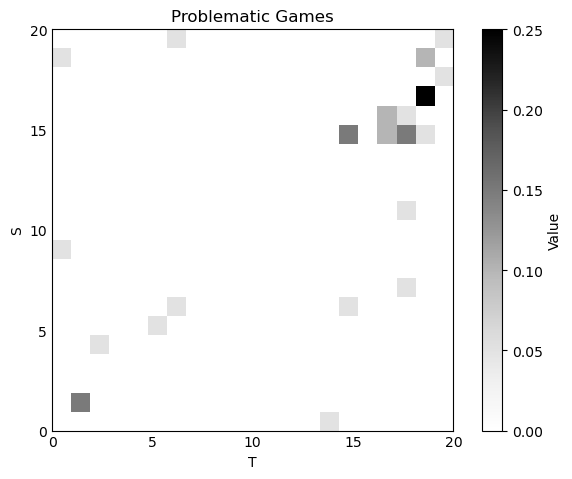

In [10]:
# Matriu de bloquejos
plt.imshow(
    sticking,
    extent=[0, 20, 0, 20],
    aspect='equal',
    cmap='Greys',)
    #vmin=0,   # forcem que el mínim de l'escala sigui 0
    #vmax=1 )   # forcem que el màxim sigui 1
plt.xlabel("T")
plt.ylabel("S")
plt.colorbar(label="Value")
plt.tight_layout()

plt.xticks((0,5,10,15,20))
plt.yticks((0,5,10,15,20))

plt.title("Problematic Games")
# Treure les ratlletes, deixar només números
plt.tick_params(axis='x', length=0)
plt.tick_params(axis='y', length=0)
plt.savefig('problematicgames.jpg')
plt.show

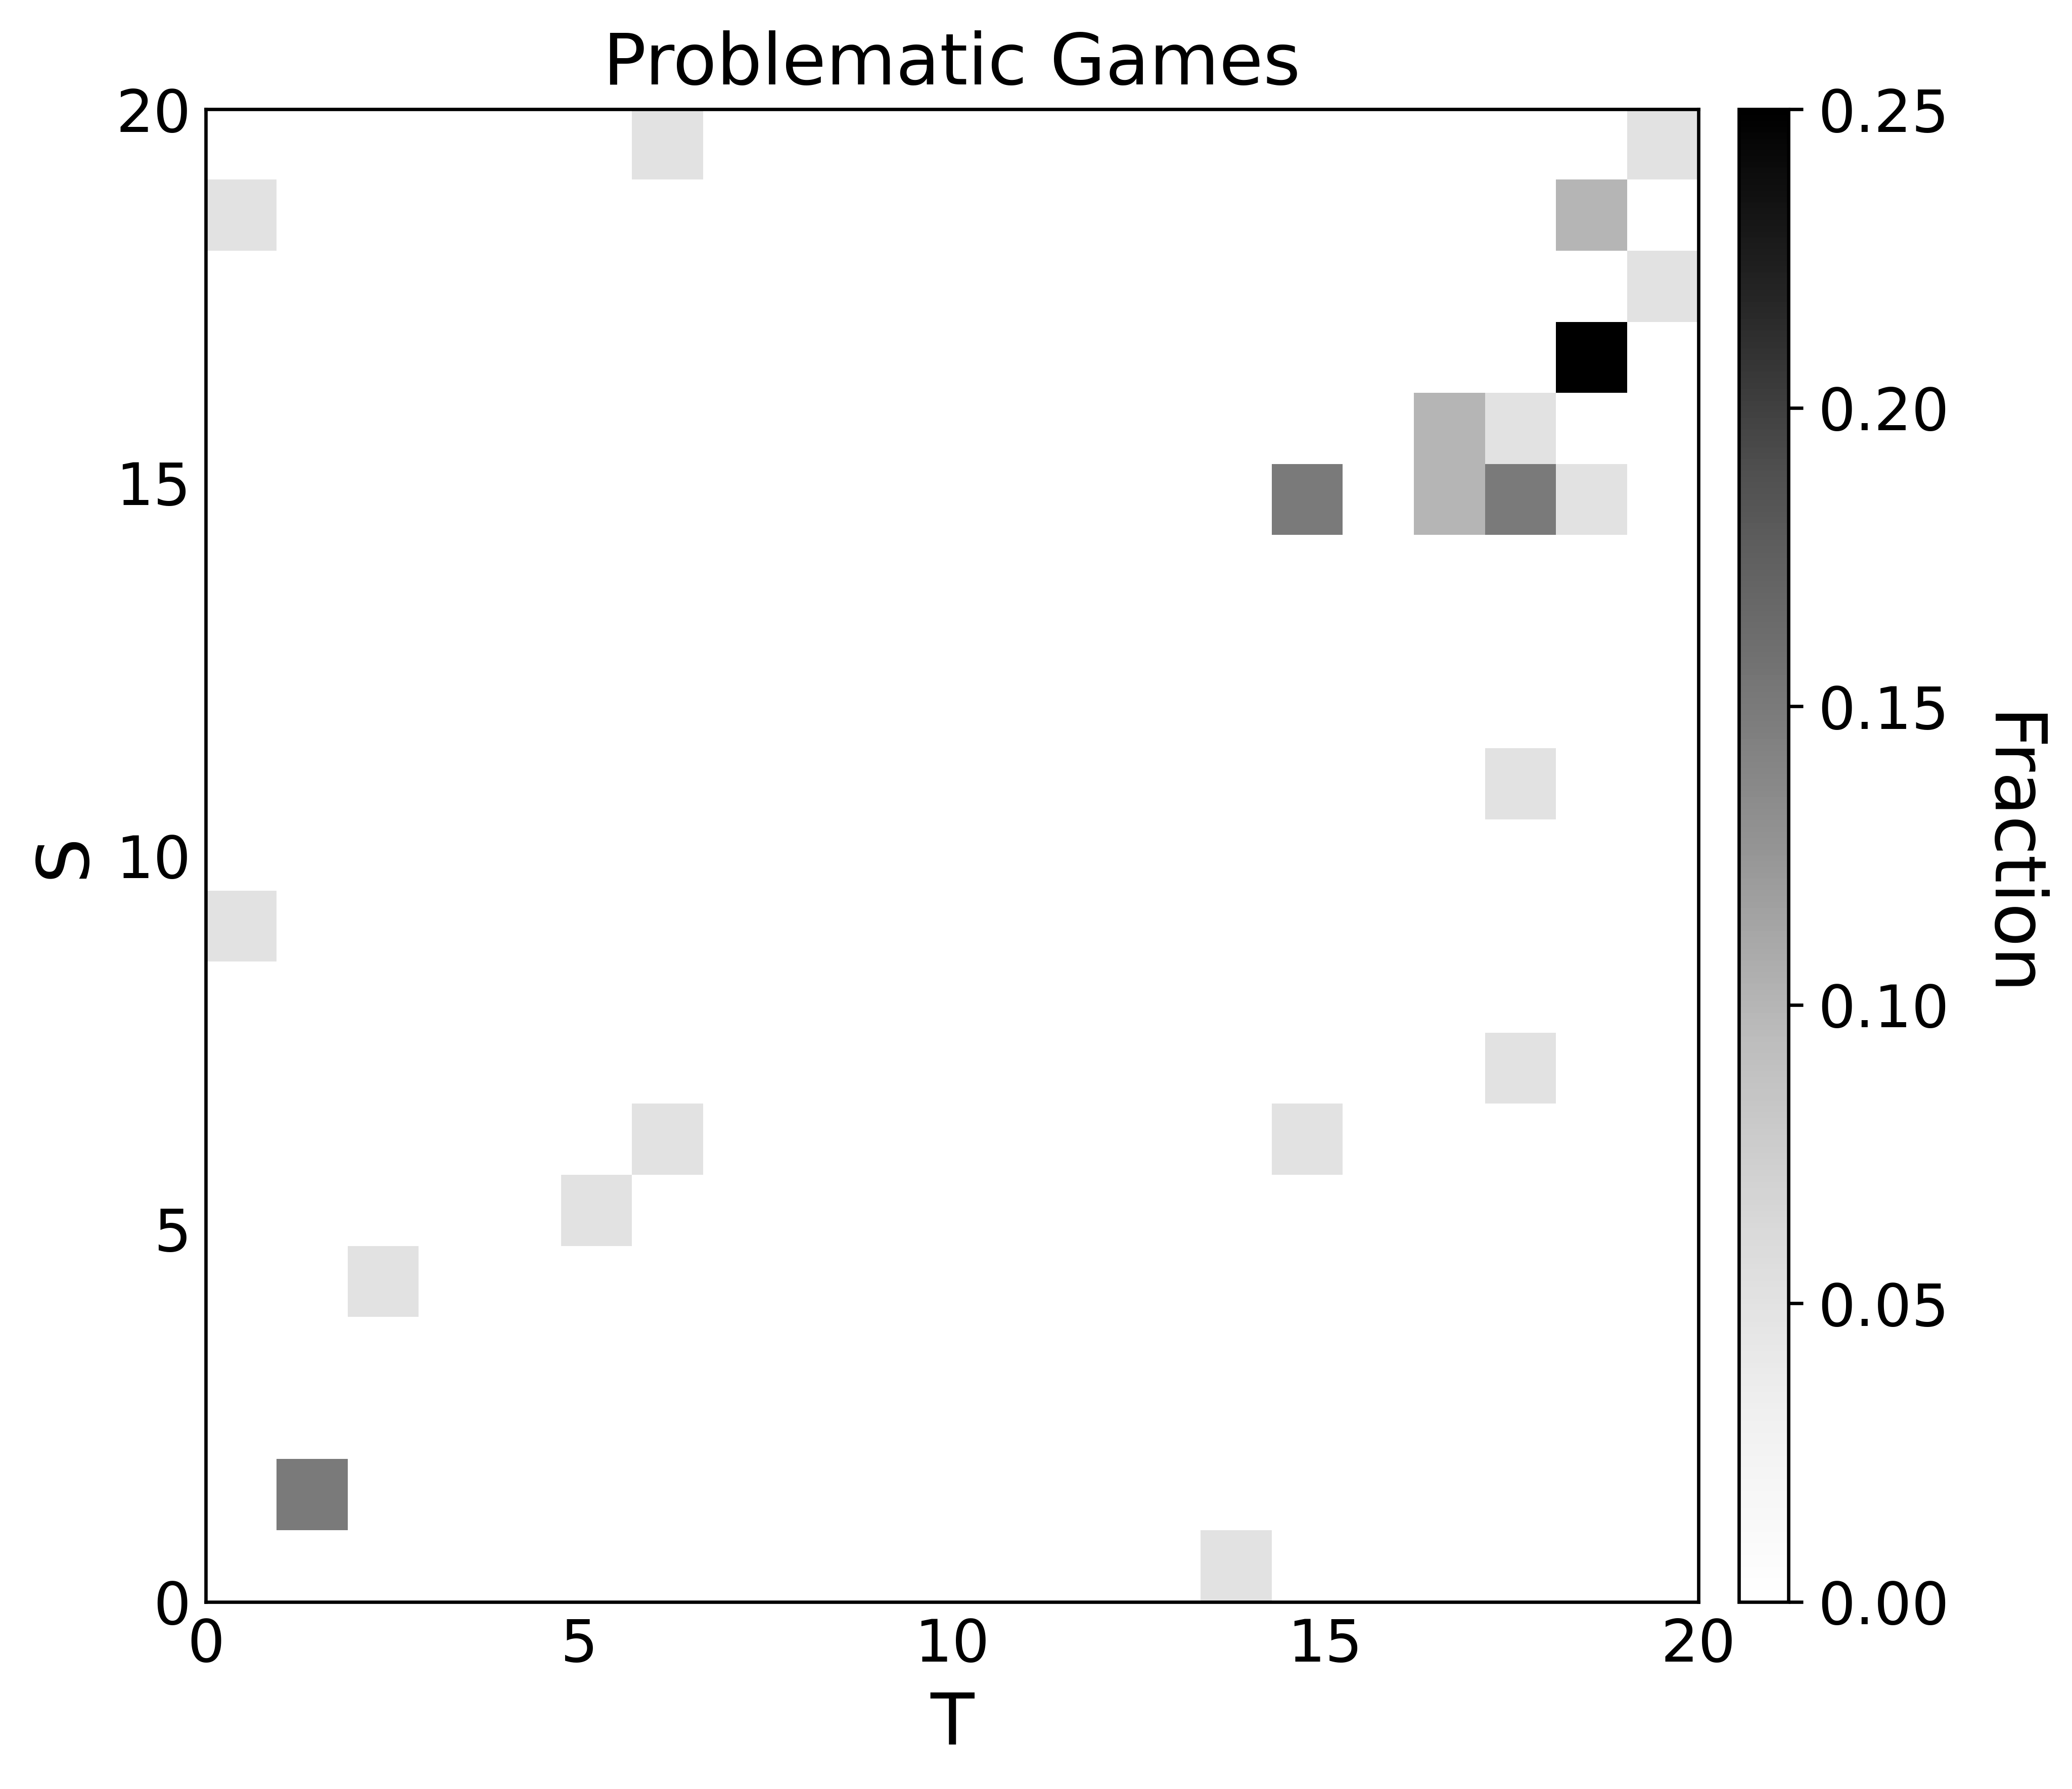

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# Crear figura
fig, ax = plt.subplots(1, 1, figsize=(7.5, 6), dpi=600)

# Matriu de bloquejos
im = ax.imshow(
    sticking,
    extent=[0, 20, 0, 20],
    aspect='equal',
    cmap='Greys',
    interpolation='nearest'
)

ax.set_xlabel("T", fontsize=17)
ax.set_ylabel("S", fontsize=17)
ax.set_title("Problematic Games", fontsize=17)
ax.set_xticks([0, 5, 10, 15, 20])
ax.set_yticks([0, 5, 10, 15, 20])
ax.tick_params(axis='x', length=0, labelsize=14)
ax.tick_params(axis='y', length=0, labelsize=14)

# Colorbar
cbar = fig.colorbar(im, ax=ax, pad=0.02, aspect=30)
cbar.set_label("Fraction", rotation=270, labelpad=22, fontsize=17)
cbar.ax.tick_params(labelsize=14)

plt.tight_layout()
plt.savefig('problematicgames.svg', format='svg', bbox_inches='tight', dpi=600)
plt.savefig('problematicgames.pdf', format='pdf', bbox_inches='tight', dpi=600)
plt.show()